In [2]:
from __future__ import print_function,division,absolute_import
import numpy as np
np.random.seed(1337)

In [3]:
#Now Let's define the model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Activation,Flatten,BatchNormalization
from keras.optimizers import Adam,Adadelta,RMSprop
from keras.losses import categorical_crossentropy
from keras import utils

In [4]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(64,3,
           padding='same',
           input_shape=(1,100,100)),
    Activation('elu'),
    Dropout(0.25),
    Conv2D(64,3),
    Activation('elu'),
    MaxPool2D(pool_size=2),
  
    BatchNormalization(),
    
    Conv2D(128,3),
    Activation('elu'),
    Dropout(0.25),
    Conv2D(128,3),
    Activation('elu'),
    MaxPool2D(pool_size=2),
    
    BatchNormalization(),
    

    Conv2D(256,3),
    Activation('elu'),
    Dropout(0.25),
    Conv2D(256,3),
    Activation('elu'),
    MaxPool2D(pool_size=2),
    
    BatchNormalization(),
    
    
    Conv2D(512,3),
    Activation('elu'),
    Dropout(0.25),
    Conv2D(512,3),
    Activation('elu'),
    MaxPool2D(pool_size=2),
    
    BatchNormalization(),
    
    
    Flatten(),
]

classification_layers = [
    Dense(512),
    Activation('elu'),
    Dropout(0.5),
    
    
    Dense(256),
    Activation('elu'),
    Dropout(0.5),
    
    Dense(10),
    Activation('softmax')
]

#model building
model = Sequential(feature_layers + classification_layers)
model.summary()
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 100, 100)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 100, 100)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 98, 98)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 98, 98)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 49, 49)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 49, 49)        196       
__________

In [5]:
dat = np.load('ASL_Train.npz')
trainX,TrainY = dat['arr_0'],dat['arr_1']
trainY = utils.np_utils.to_categorical(TrainY,10)
trainX = trainX/255
trainX = trainX.astype('float32')
trainX = trainX.reshape((trainX.shape[0],1,100,100)).astype('float32')
print(trainX.shape,trainY.shape)

(4800, 1, 100, 100) (4800, 10)


In [6]:
dat = np.load('ASL_Test.npz')
testX,TestY = dat['arr_0'],dat['arr_1']
testY = utils.np_utils.to_categorical(TestY,10)
testX = testX/255
testX = testX.astype('float32')
testX = testX.reshape((testX.shape[0],1,100,100)).astype('float32')
print(testX.shape,testY.shape)

(200, 1, 100, 100) (200, 10)


In [6]:
#now let's make the data Augmentation
from keras.callbacks import TensorBoard,ModelCheckpoint
from os.path import isfile
data_aug_weight_file = 'ASL-new-normal-weights.h5'

if (isfile(data_aug_weight_file)):
    model.load_weights(data_aug_weight_file)

checkpoint = ModelCheckpoint(data_aug_weight_file, monitor='acc', verbose=1, save_best_only=True, mode='max')
tensorboard = TensorBoard(log_dir='./logs-ASL-normal', histogram_freq=0,write_graph=True, write_images=True)
callbacks_list=[checkpoint,tensorboard]

model.fit(trainX, trainY, batch_size=24,epochs=200,verbose=1, validation_data=(testX, testY),callbacks=callbacks_list)

Train on 4800 samples, validate on 200 samples
Epoch 1/200
4800/4800 [==============================] - 56s - loss: 2.8154 - acc: 0.2131 - val_loss: 2.9441 - val_acc: 0.1350
Epoch 2/200
4800/4800 [==============================] - 52s - loss: 1.0947 - acc: 0.6367 - val_loss: 5.3984 - val_acc: 0.1000
Epoch 3/200
4800/4800 [==============================] - 53s - loss: 0.3347 - acc: 0.8877 - val_loss: 1.9122 - val_acc: 0.5300
Epoch 4/200
4800/4800 [==============================] - 53s - loss: 0.1671 - acc: 0.9456 - val_loss: 0.6246 - val_acc: 0.8050
Epoch 5/200
4800/4800 [==============================] - 53s - loss: 0.1020 - acc: 0.9679 - val_loss: 0.2416 - val_acc: 0.9500
Epoch 6/200
4800/4800 [==============================] - 53s - loss: 0.0527 - acc: 0.9831 - val_loss: 0.2227 - val_acc: 0.9450
Epoch 7/200
4800/4800 [==============================] - 53s - loss: 0.0376 - acc: 0.9852 - val_loss: 0.1198 - val_acc: 0.9650
Epoch 8/200
4800/4800 [==============================] - 53s - l

KeyboardInterrupt: 

In [8]:
#now let's make the data Augmentation
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
         rotation_range=20,
         width_shift_range=0.4,
         height_shift_range=0.4,
         zoom_range=.4,
         vertical_flip=True,
        )


from keras.callbacks import TensorBoard,ModelCheckpoint
from os.path import isfile
data_aug_weight_file = 'ASL-weights-data_aug-25jul.h5'

if (isfile(data_aug_weight_file)):
    model.load_weights(data_aug_weight_file)

checkpoint = ModelCheckpoint(data_aug_weight_file_new, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
tensorboard = TensorBoard(log_dir='./logs-dataAug-asl', histogram_freq=0,
                          write_graph=True, write_images=True)

model.fit_generator(train_datagen.flow(trainX, trainY, batch_size=10),validation_data=(testX,testY),
                    steps_per_epoch=len(trainX) /10, epochs=300,callbacks=[checkpoint,tensorboard])
                    # Trying to change batch size


Epoch 1/300
480/480 [==============================] - 63s - loss: 3.1855 - acc: 0.1102 - val_loss: 2.5515 - val_acc: 0.1000
Epoch 2/300
480/480 [==============================] - 61s - loss: 2.6779 - acc: 0.1073 - val_loss: 2.3539 - val_acc: 0.1100
Epoch 3/300
480/480 [==============================] - 61s - loss: 2.5709 - acc: 0.1142 - val_loss: 2.2565 - val_acc: 0.1450
Epoch 4/300
480/480 [==============================] - 61s - loss: 2.4945 - acc: 0.1148 - val_loss: 2.3452 - val_acc: 0.1250
Epoch 5/300
480/480 [==============================] - 61s - loss: 2.4526 - acc: 0.1204 - val_loss: 2.2712 - val_acc: 0.1250
Epoch 6/300
480/480 [==============================] - 62s - loss: 2.4046 - acc: 0.1277 - val_loss: 2.2526 - val_acc: 0.1500
Epoch 7/300
480/480 [==============================] - 62s - loss: 2.3694 - acc: 0.1231 - val_loss: 2.2559 - val_acc: 0.1500
Epoch 8/300
480/480 [==============================] - 61s - loss: 2.3272 - acc: 0.1306 - val_loss: 2.3350 - val_acc: 0.1300


480/480 [==============================] - 61s - loss: 0.5393 - acc: 0.8008 - val_loss: 0.0910 - val_acc: 0.9600
Epoch 63/300
480/480 [==============================] - 61s - loss: 0.5343 - acc: 0.8015 - val_loss: 0.0426 - val_acc: 0.9850
Epoch 64/300
480/480 [==============================] - 61s - loss: 0.5479 - acc: 0.8019 - val_loss: 0.0609 - val_acc: 0.9800
Epoch 65/300
480/480 [==============================] - 61s - loss: 0.5712 - acc: 0.7960 - val_loss: 0.0526 - val_acc: 0.9850
Epoch 66/300
480/480 [==============================] - 61s - loss: 0.5355 - acc: 0.8029 - val_loss: 0.1120 - val_acc: 0.9400
Epoch 67/300
480/480 [==============================] - 61s - loss: 0.5154 - acc: 0.8096 - val_loss: 0.0370 - val_acc: 0.9850
Epoch 68/300
480/480 [==============================] - 61s - loss: 0.5146 - acc: 0.8150 - val_loss: 0.0244 - val_acc: 0.9950
Epoch 69/300
480/480 [==============================] - 61s - loss: 0.5321 - acc: 0.8021 - val_loss: 0.0293 - val_acc: 0.9950
Epoch

480/480 [==============================] - 61s - loss: 0.4178 - acc: 0.8481 - val_loss: 0.1152 - val_acc: 0.9700
Epoch 130/300
480/480 [==============================] - 61s - loss: 0.4238 - acc: 0.8446 - val_loss: 0.0258 - val_acc: 0.9900
Epoch 131/300
480/480 [==============================] - 61s - loss: 0.4152 - acc: 0.8521 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 132/300
480/480 [==============================] - 61s - loss: 0.4035 - acc: 0.8556 - val_loss: 0.0123 - val_acc: 0.9950
Epoch 133/300
480/480 [==============================] - 61s - loss: 0.4206 - acc: 0.8460 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 134/300
480/480 [==============================] - 61s - loss: 0.4226 - acc: 0.8429 - val_loss: 0.0134 - val_acc: 0.9950
Epoch 135/300
480/480 [==============================] - 61s - loss: 0.4137 - acc: 0.8483 - val_loss: 0.0131 - val_acc: 0.9950
Epoch 136/300
480/480 [==============================] - 61s - loss: 0.4146 - acc: 0.8485 - val_loss: 0.0873 - val_acc: 0.975

480/480 [==============================] - 61s - loss: 0.3598 - acc: 0.8690 - val_loss: 0.0153 - val_acc: 0.9950
Epoch 197/300
480/480 [==============================] - 61s - loss: 0.3648 - acc: 0.8629 - val_loss: 0.0203 - val_acc: 0.9950
Epoch 198/300
480/480 [==============================] - 61s - loss: 0.3685 - acc: 0.8640 - val_loss: 0.0191 - val_acc: 0.9900
Epoch 199/300
480/480 [==============================] - 61s - loss: 0.3662 - acc: 0.8633 - val_loss: 0.0311 - val_acc: 0.9800
Epoch 200/300
480/480 [==============================] - 61s - loss: 0.3686 - acc: 0.8654 - val_loss: 0.0774 - val_acc: 0.9750
Epoch 201/300
480/480 [==============================] - 61s - loss: 0.3748 - acc: 0.8615 - val_loss: 0.0255 - val_acc: 0.9850
Epoch 202/300
480/480 [==============================] - 61s - loss: 0.3730 - acc: 0.8690 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 203/300
480/480 [==============================] - 61s - loss: 0.3722 - acc: 0.8648 - val_loss: 0.0147 - val_acc: 0.995

480/480 [==============================] - 61s - loss: 0.3388 - acc: 0.8748 - val_loss: 0.0834 - val_acc: 0.9700
Epoch 264/300
480/480 [==============================] - 61s - loss: 0.3295 - acc: 0.8790 - val_loss: 0.0141 - val_acc: 0.9950
Epoch 265/300
480/480 [==============================] - 61s - loss: 0.3547 - acc: 0.8729 - val_loss: 0.0771 - val_acc: 0.9800
Epoch 266/300
480/480 [==============================] - 61s - loss: 0.3336 - acc: 0.8796 - val_loss: 0.0319 - val_acc: 0.9800
Epoch 267/300
480/480 [==============================] - 61s - loss: 0.3398 - acc: 0.8798 - val_loss: 0.0522 - val_acc: 0.9800
Epoch 268/300
480/480 [==============================] - 61s - loss: 0.3514 - acc: 0.8677 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 269/300
480/480 [==============================] - 61s - loss: 0.3465 - acc: 0.8715 - val_loss: 0.0831 - val_acc: 0.9750
Epoch 270/300
480/480 [==============================] - 61s - loss: 0.3493 - acc: 0.8715 - val_loss: 0.1304 - val_acc: 0.970

In [9]:
import pandas as pd

model.load_weights('ASL-new-normal-weights.h5')
y_test = np.load('ASL_Test.npz')['arr_1']
y_test = y_test.astype('int8')
y_hat = model.predict_classes(testX
                             )
pd.crosstab(y_test,y_hat)

200/200 [==============================] - 1s     


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,20,0,0,0,0,0,0,0,0,0
1,0,20,0,0,0,0,0,0,0,0
2,0,0,20,0,0,0,0,0,0,0
3,0,0,0,20,0,0,0,0,0,0
4,0,0,0,0,20,0,0,0,0,0
5,0,0,0,0,0,20,0,0,0,0
6,0,0,0,0,0,0,20,0,0,0
7,0,0,0,0,0,0,2,18,0,0
8,0,0,0,0,0,0,0,0,20,0


Wrong Test Cases: 3


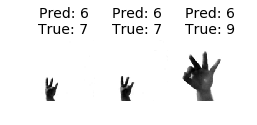

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

test_wrong = [im for im in zip(testX,y_hat,y_test) if im[1] != im[2]]
print("Wrong Test Cases:",len(test_wrong))


plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((100,100))
    plt.axis("off")
    plt.title(str('Pred: '+str(val[1]))+'\n'+str('True: '+str(val[2])), fontsize=14, color='black')
    plt.imshow(im, cmap='gray')

# The result

Result slows that after training with data augmentation the DNN has a 100% validation accuracy and a 99.9% train accuracy, (which is without augmentation).










4800/4800 [==============================] - 12s    
Wrong Test Cases: 9


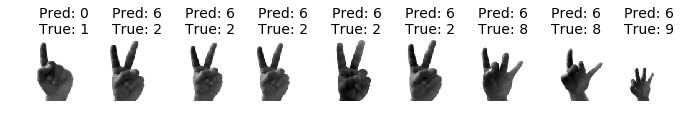

In [17]:
model.load_weights('ASL-new-normal-weights.h5')
y_test = np.load('ASL_Train.npz')['arr_1']
y_test = y_test.astype('int8')
y_hat = model.predict_classes(trainX
                             )
pd.crosstab(y_test,y_hat)
test_wrong = [im for im in zip(trainX,y_hat,y_test) if im[1] != im[2]]
print("Wrong Test Cases:",len(test_wrong))


plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((100,100))
    plt.axis("off")
    plt.title(str('Pred: '+str(val[1]))+'\n'+str('True: '+str(val[2])), fontsize=14, color='black')
    plt.imshow(im, cmap='gray')